In [1]:
import os
print(os.getcwd())

/Users/mac/Desktop/python_struggle/ML/Real-Time fraud Detection/notebooks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_dataset(filepath: str = '../data/training/training_dataset.csv', ext: str = 'csv'):
    if ext == 'csv':
        return pd.read_csv(filepath)
    if ext == 'parquet':
        return pd.read_parquet(filepath)
    
    return pd.DataFrame({"Exception" : "Wrong file extension"})

In [4]:
df = load_dataset()

In [5]:
df

,SK_ID_CURR,label,is_male,age_years,years_employed,flag_own_car,flag_own_realty,credit_to_income_ratio,annuity_to_income_ratio,income_per_person,ext_source_1,ext_source_2,ext_source_3,ext_source_mean
0,100002,1,1,25.902806,1.744011,0,1,2.007889,0.121978,202500.0,0.083037,0.262949,0.139376,0.161787
1,100003,0,0,45.900068,3.252567,0,0,4.790750,0.132217,135000.0,0.311267,0.622246,NaN,0.466757
2,100004,0,1,52.145106,0.616016,1,1,2.000000,0.100000,67500.0,NaN,0.555912,0.729567,0.642739
3,100006,0,0,52.032854,8.320329,0,1,2.316167,0.219900,67500.0,NaN,0.650442,NaN,0.650442
4,100007,0,1,54.570842,8.317591,0,1,4.222222,0.179963,121500.0,NaN,0.322738,NaN,0.322738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,25.535934,0.646133,0,0,1.617143,0.174971,157500.0,0.145570,0.681632,NaN,0.413601
307507,456252,0,0,56.878850,NaN,0,1,3.743750,0.166687,72000.0,NaN,0.115992,NaN,0.115992
307508,456253,0,0,40.974675,21.686516,0,1,4.429176,0.195941,153000.0,0.744026,0.535722,0.218859,0.499536
307509,456254,1,0,32.747433,13.103354,0,1,2.164368,0.118158,85500.0,NaN,0.514163,0.661024,0.587593


In [6]:
df.describe()

,SK_ID_CURR,label,is_male,age_years,years_employed,flag_own_car,flag_own_realty,credit_to_income_ratio,annuity_to_income_ratio,income_per_person,ext_source_1,ext_source_2,ext_source_3,ext_source_mean
count,307511.000000,307511.000000,307511.000000,307511.000000,252137.000000,307511.000000,307511.000000,307511.000000,307499.000000,3.075090e+05,134133.000000,3.068510e+05,246546.000000,307339.000000
mean,278180.518577,0.080729,0.341643,43.906900,6.527500,0.340108,0.693673,3.957570,0.180930,9.310588e+04,0.502130,5.143927e-01,0.510853,0.509251
std,102790.175348,0.272419,0.474261,11.947950,6.402081,0.473746,0.460968,2.689728,0.094574,1.013734e+05,0.211062,1.910602e-01,0.194844,0.149802
min,100002.000000,0.000000,0.000000,20.503765,-0.000000,0.000000,0.000000,0.004808,0.000224,2.812500e+03,0.014568,8.173617e-08,0.000527,0.000006
25%,189145.500000,0.000000,0.000000,33.984942,2.099932,0.000000,0.000000,2.018667,0.114782,4.725000e+04,0.334007,3.924574e-01,0.370650,0.413648
50%,278202.000000,0.000000,0.000000,43.121150,4.511978,0.000000,1.000000,3.265067,0.162833,7.500000e+04,0.505998,5.659614e-01,0.535276,0.524502
75%,367142.500000,0.000000,1.000000,53.886379,8.692676,1.000000,1.000000,5.159880,0.229067,1.125000e+05,0.675053,6.636171e-01,0.669057,0.622819
max,456255.000000,1.000000,1.000000,69.073238,49.040383,1.000000,1.000000,84.736842,1.875965,3.900000e+07,0.962693,8.549997e-01,0.896010,0.878903


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SK_ID_CURR               307511 non-null  int64  
 1   label                    307511 non-null  int64  
 2   is_male                  307511 non-null  int64  
 3   age_years                307511 non-null  float64
 4   years_employed           252137 non-null  float64
 5   flag_own_car             307511 non-null  int64  
 6   flag_own_realty          307511 non-null  int64  
 7   credit_to_income_ratio   307511 non-null  float64
 8   annuity_to_income_ratio  307499 non-null  float64
 9   income_per_person        307509 non-null  float64
 10  ext_source_1             134133 non-null  float64
 11  ext_source_2             306851 non-null  float64
 12  ext_source_3             246546 non-null  float64
 13  ext_source_mean          307339 non-null  float64
dtypes: f

Fraud, %: 0.08072881945686496
Not a fraud, %: 0.9192711805431351
Ratio: 11.387150050352467


Text(0.5, 1.0, 'Fraud Pie Distribution')

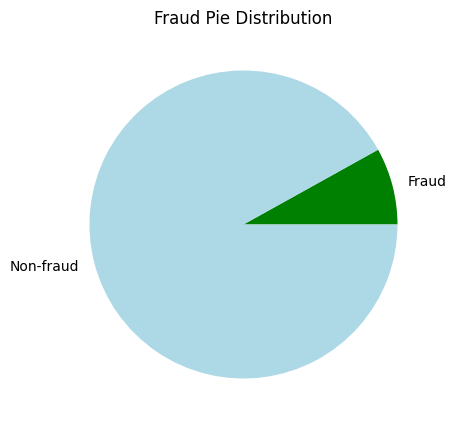

In [8]:
fraud_count = len(df[df['label'] == True])
non_fraud_count = len(df) - fraud_count

fraud_percent = fraud_count/(non_fraud_count + fraud_count)
non_fraud_percent = non_fraud_count/(fraud_count + non_fraud_count)

print(f'Fraud, %: {fraud_percent}')
print(f'Not a fraud, %: {non_fraud_percent}')
print(f'Ratio: {non_fraud_count / fraud_count}')
plt.figure(figsize=(5,5))
plt.pie([fraud_percent, non_fraud_percent], labels=['Fraud', 'Non-fraud'], colors=['green', 'lightblue'])
plt.title('Fraud Pie Distribution')